In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#case 4
Soi=0.80
Swi=0.20
Sor=0.35
meu_O=[2000]
meu_W=0.4

,Recovery,So,Sw,S*,Kro,Krw,fw
0,0.00,0.800,0.200,-1.233581e-16,1.000000,-1.877168e-48,-9.385840e-45
1,0.01,0.792,0.208,1.777778e-02,0.947609,5.618656e-06,2.879287e-02
2,0.02,0.784,0.216,3.555556e-02,0.897081,4.494925e-05,2.003394e-01
3,0.03,0.776,0.224,5.333333e-02,0.848382,1.517037e-04,4.720384e-01
4,0.04,0.768,0.232,7.111111e-02,0.801477,3.595940e-04,6.916739e-01
...,...,...,...,...,...,...,...
70,0.70,0.240,0.760,1.244444e+00,-0.014606,1.927199e+00,1.000002e+00
71,0.71,0.232,0.768,1.262222e+00,-0.018031,2.010979e+00,1.000002e+00
72,0.72,0.224,0.776,1.280000e+00,-0.021952,2.097152e+00,1.000002e+00
73,0.73,0.216,0.784,1.297778e+00,-0.026404,2.185753e+00,1.000002e+00


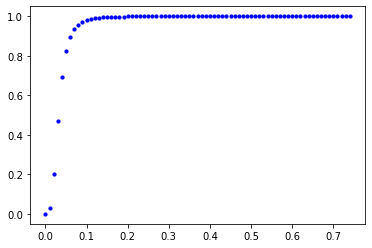

In [3]:
rec=np.arange(0.00,0.75,0.01)
So_arr=[]
Sw_arr=[]
s_norm_arr=[]
Krw_arr=[]
Kro_arr=[]
fw_arr=[]
for i in meu_O:
    for r in rec:
        So=Soi-r*Soi
        Sw=1-So
        s_norm=((Sw-Swi)/(1-Swi-Sor))
        Krw=(s_norm)**3
        Kro=(1-s_norm)**3
        fw=1/(1+((Kro*meu_W)/(Krw*i)))
        fw_arr.append(fw)
        So_arr.append(So)
        Sw_arr.append(Sw)
        s_norm_arr.append(s_norm)
        Krw_arr.append(Krw)
        Kro_arr.append(Kro)
len(fw_arr)
df1=DataFrame([rec,So_arr,Sw_arr,s_norm_arr,Kro_arr,Krw_arr,fw_arr],index=['Recovery','So','Sw','S*','Kro','Krw','fw']).T
plt.scatter('Recovery' ,'fw', data=df1 , s=10 ,c='b')
df1

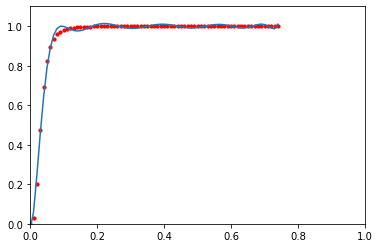

In [4]:
X=df1['Recovery']
Y=df1['fw']

XC=np.linspace(0,0.75)
f=np.poly1d(np.polyfit(X,Y,12))
plt.scatter(X,Y,c='r',s=10)
plt.plot(X,f(X))
plt.xlim(0,1)
plt.ylim(0,1.1)
plt.show()

In [5]:
spc=200 #(mtr)
feild_area=20 #(km2)
wells_req=round((feild_area*0.90)/(spc/1000)**2)
wells_req

450

In [6]:
well_per_month=2
j=0
well_per_month_arr=[]
months_arr=[]
eff_well_arr=[]
cum_wells_drilled_arr=[]
time=2 #(months)
Eff_wells_on_prod_for_1year_arr=[]
for l in range(0,time):
    Eff_wells_on_prod_for_1year_arr.append(0)
    eff_well_arr.append(0)
g=0
for i in range(1,13):
    months=j+i
    cum_wells_drilled=2*i
    cum_wells_drilled_arr.append(cum_wells_drilled)
    months_arr.append(months)
    well_per_month_arr.append(well_per_month)
for i in range(1,(13-time)):
    eff_well=2*i
    Eff_wells_on_prod_for_1year=well_per_month*(len(months_arr)-time-g)/12
    g+=1
    Eff_wells_on_prod_for_1year_arr.append(Eff_wells_on_prod_for_1year)
    eff_well_arr.append(eff_well)
    
df1=DataFrame([months_arr,well_per_month_arr,cum_wells_drilled_arr,eff_well_arr,Eff_wells_on_prod_for_1year_arr],index=['Month','Wells Per Month','Cum Wells Drilled','Eff. Wells on Prod','Eff wells on prod for 1year']).T
df1.index.name='Sr. No.'
df1

,Month,Wells Per Month,Cum Wells Drilled,Eff. Wells on Prod,Eff wells on prod for 1year
Sr. No.,,,,,
0,1.0,2.0,2.0,0.0,0.000000
1,2.0,2.0,4.0,0.0,0.000000
2,3.0,2.0,6.0,2.0,1.666667
3,4.0,2.0,8.0,4.0,1.500000
4,5.0,2.0,10.0,6.0,1.333333
5,6.0,2.0,12.0,8.0,1.166667
6,7.0,2.0,14.0,10.0,1.000000
7,8.0,2.0,16.0,12.0,0.833333
8,9.0,2.0,18.0,14.0,0.666667


In [7]:
total_Eff_wells_on_prod_for_1year=int(sum(Eff_wells_on_prod_for_1year_arr))
total_Eff_wells_on_prod_for_1year

9

In [8]:
#given_data
test_rate_of_ver_well=15 #(m3/d)

OIIP=25 #(MMm3)


#+====================================
year_arr=[]
max_well_in_year_arr=[]
total_wells_drilled_arr=[]
wells_on_prod_arr=[]
wells_on_prod=total_Eff_wells_on_prod_for_1year
wells_on_prod_arr.append(wells_on_prod)
j=0
max_well_in_year=24
max_well_in_year_arr.append(24)
for i in range(0,20):
    if max_well_in_year<wells_req:
        max_well_in_year+=24
        max_well_in_year_arr.append(24)
    else:
        max_well_in_year_arr.append(0)
total_wells_drilled=24
for i in range(0,20):
    if total_wells_drilled<=432:
        total_wells_drilled+=24
        total_wells_drilled_arr.append(24)
    elif total_wells_drilled>432 and total_wells_drilled==456:
        total_wells_drilled+=24
        total_wells_drilled_arr.append(18)
    else:
        total_wells_drilled_arr.append(0)
#==========wells_on_prod====================
for i in range(0,20):
    year_arr.append(j+1)
    if wells_on_prod<441:
        wells_on_prod=wells_on_prod_arr[j]+(24-9)+9
        wells_on_prod_arr.append(wells_on_prod)
    elif wells_on_prod>=441:
        wells_on_prod_arr.append(wells_req)
    j+=1
len(max_well_in_year_arr),len(total_wells_drilled_arr),(wells_on_prod_arr)

(21,
 20,
 [9,
  33,
  57,
  81,
  105,
  129,
  153,
  177,
  201,
  225,
  249,
  273,
  297,
  321,
  345,
  369,
  393,
  417,
  441,
  450,
  450])

In [9]:
wc_app_arr=[]
liq_rate_arr=[]
oil_rate_arr=[]
approx_cum_oil_arr=[]
Np_by_N_arr=[]
end_of_year_wcut_arr=[]
avg_water_arr=[]
avg_oil_rate_arr=[]
cum_oil_arr=[]
oil_rec_arr=[]
approx_cum_oil=0
wc_app=0
wc_app_arr.append(0)
cum_oil=0
for i in range(0,20):
    liq_rate=wells_on_prod_arr[i]*test_rate_of_ver_well
    oil_rate=liq_rate*(1-wc_app_arr[i])
    approx_cum_oil=approx_cum_oil+(oil_rate*365/1000000)
    k=approx_cum_oil/OIIP
    y=abs(f(k))
    #y= abs(round(f[0]*k**p + f[1]*k**(p-1) +  f[2]*k**(p-2) + f[3]*k**(p-3) + f[4]*k**(p-4) + f[5]*k**(p-5) + f[6]*k**(p-6)+f[7]*k**(p-7)+f[8]*k**(p-8)+f[9]*k**(p-9)+f[10]*k**(p-10)+f[11]*k**(p-11)+f[12]*k**(p-12),4))
    end_of_year_wcut_arr.append(y)
    wc_app_arr.append(y)
    avg_water=(wc_app_arr[i]+end_of_year_wcut_arr[i])/2
    avg_oil_rate=liq_rate*(1-avg_water)
    cum_oil+=(avg_oil_rate*365/1000000)
    oil_rec=(cum_oil*100*0.95/OIIP)
    oil_rec_arr.append(oil_rec)
    cum_oil_arr.append(cum_oil)
    avg_oil_rate_arr.append(avg_oil_rate)
    avg_water_arr.append(avg_water)
    Np_by_N_arr.append(k)
    liq_rate_arr.append(liq_rate)
    oil_rate_arr.append(oil_rate)
    approx_cum_oil_arr.append(approx_cum_oil)
    

In [10]:
df3=DataFrame([year_arr,max_well_in_year_arr,total_wells_drilled_arr,wells_on_prod_arr,liq_rate_arr,wc_app_arr,oil_rate_arr,approx_cum_oil_arr,Np_by_N_arr,end_of_year_wcut_arr,avg_water_arr,avg_oil_rate_arr,cum_oil_arr,oil_rec_arr],index=[['year_arr','max_well_in_year_arr','total_wells_drilled_arr','wells_on_prod_arr','liq_rate_arr','wc_app_arr','oil_rate_arr','approx_cum_oil_arr','Np_by_N_arr','end_of_year_wcut_arr','avg_water_arr','avg_oil_rate_arr','cum_oil_arr','oil_rec_arr']]).T.head(19)

In [11]:
oil_rec_perc_arr=[]
for i in range(0,20):
    oil_rec_perc=round(oil_rec_arr[i]/100,4)
    oil_rec_perc_arr.append(oil_rec_perc)
df3['oil_rec_perc_arr']=oil_rec_perc_arr[0:19]

In [12]:
new_oil_prod_in_year_arr=[]
new_oil_prod_in_year_arr=[9,24,17]
for i in range(0,17):
    new_oil_prod_in_year_arr.append(0)
    

In [13]:
total_oil_producers_arr=wells_on_prod_arr
r_by_p_arr=[]
for i in range(0,20):
    d=(OIIP-cum_oil_arr[i])/(avg_oil_rate_arr[i]*365/1000000)
    r_by_p_arr.append(d)
#len(cum_oil_arr),avg_oil_rate_arr


In [14]:
df4=DataFrame([year_arr,new_oil_prod_in_year_arr,total_oil_producers_arr,avg_oil_rate_arr,avg_water_arr,cum_oil_arr,oil_rec_arr,r_by_p_arr],index=['Year','new_oil_prod_in_year','total_oil_producers','avg_oil_rate','avg_water','cum_oil','oil_rec','R/P']).T.head(19)

## Production Profile

In [15]:

df3

,year_arr,max_well_in_year_arr,total_wells_drilled_arr,wells_on_prod_arr,liq_rate_arr,wc_app_arr,oil_rate_arr,approx_cum_oil_arr,Np_by_N_arr,end_of_year_wcut_arr,avg_water_arr,avg_oil_rate_arr,cum_oil_arr,oil_rec_arr,oil_rec_perc_arr
0,1.0,24.0,24.0,9.0,135.0,0.000000,135.000000,0.049275,0.001971,0.022201,0.011101,133.501407,0.048728,0.185166,0.0019
1,2.0,24.0,24.0,33.0,495.0,0.022201,484.010320,0.225939,0.009038,0.046631,0.034416,477.963869,0.223185,0.848102,0.0085
2,3.0,24.0,24.0,57.0,855.0,0.046631,815.130084,0.523461,0.020938,0.267053,0.156842,720.899809,0.486313,1.847990,0.0185
3,4.0,24.0,24.0,81.0,1215.0,0.267053,890.530391,0.848505,0.033940,0.532377,0.399715,729.346019,0.752525,2.859593,0.0286
4,5.0,24.0,24.0,105.0,1575.0,0.532377,736.505839,1.117329,0.044693,0.715272,0.623824,592.476509,0.968778,3.681358,0.0368
5,6.0,24.0,24.0,129.0,1935.0,0.715272,550.949392,1.318426,0.052737,0.819894,0.767583,449.727544,1.132929,4.305130,0.0431
6,7.0,24.0,24.0,153.0,2295.0,0.819894,413.343964,1.469297,0.058772,0.879986,0.849940,344.387604,1.258631,4.782796,0.0478
7,8.0,24.0,24.0,177.0,2655.0,0.879986,318.636145,1.585599,0.063424,0.916287,0.898137,270.447114,1.357344,5.157906,0.0516
8,9.0,24.0,24.0,201.0,3015.0,0.916287,252.394771,1.677723,0.067109,0.939390,0.927838,217.567571,1.436756,5.459672,0.0546
9,10.0,24.0,24.0,225.0,3375.0,0.939390,204.560116,1.752387,0.070095,0.954771,0.947080,178.603899,1.501946,5.707396,0.0571


## Master Table

In [16]:
df4

,Year,new_oil_prod_in_year,total_oil_producers,avg_oil_rate,avg_water,cum_oil,oil_rec,R/P
0,1.0,9.0,9.0,133.501407,0.011101,0.048728,0.185166,512.051900
1,2.0,24.0,33.0,477.963869,0.034416,0.223185,0.848102,142.022629
2,3.0,17.0,57.0,720.899809,0.156842,0.486313,1.847990,93.162441
3,4.0,0.0,81.0,729.346019,0.399715,0.752525,2.859593,91.083571
4,5.0,0.0,105.0,592.476509,0.623824,0.968778,3.681358,111.125018
5,6.0,0.0,129.0,449.727544,0.767583,1.132929,4.305130,145.397444
6,7.0,0.0,153.0,344.387604,0.849940,1.258631,4.782796,188.871049
7,8.0,0.0,177.0,270.447114,0.898137,1.357344,5.157906,239.508567
8,9.0,0.0,201.0,217.567571,0.927838,1.436756,5.459672,296.720844
9,10.0,0.0,225.0,178.603899,0.947080,1.501946,5.707396,360.452541


Text(0, 0.5, 'Oil Recovery, %')

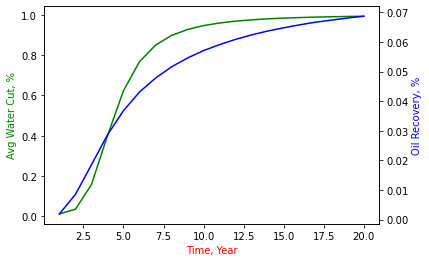

In [17]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(year_arr,avg_water_arr, 'g-')
ax2.plot(year_arr,oil_rec_perc_arr, 'b-')

ax1.set_xlabel('Time, Year',color='r')
ax1.set_ylabel('Avg Water Cut, %', color='g')
ax2.set_ylabel('Oil Recovery, %', color='b')


#case 4

Soi=0.80

Swi=0.20

Sor=0.35

meu_O=[2000]

meu_W=0.4


Here mobility ratio is 5000 that is not favorable

so first increase the water viscosity by polymer flooding and then

go for Sor (IFT reduction) by either Miscleble or ASP Process

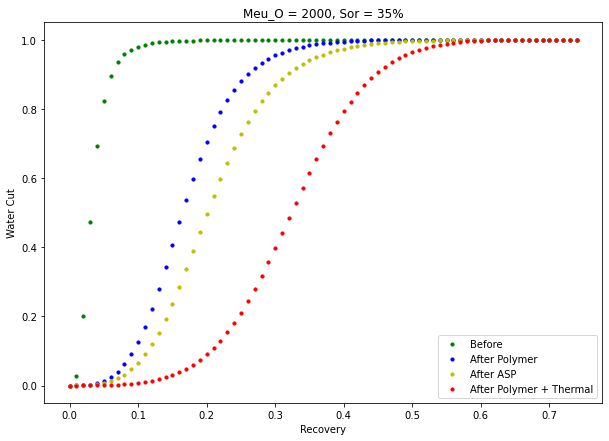

In [18]:

#case 2
Soi=0.80
Swi=0.20
Sor=0.35
meu_O=[2000]
meu_W=0.4

rec=np.arange(0.00,0.75,0.01)
So_arr=[]
Sw_arr=[]
s_norm_arr=[]
Krw_arr=[]
Kro_arr=[]
fw_arr=[]
for i in meu_O:
    for r in rec:
        So=Soi-r*Soi
        Sw=1-So
        s_norm=((Sw-Swi)/(1-Swi-Sor))
        Krw=(s_norm)**3
        Kro=(1-s_norm)**3
        fw=1/(1+((Kro*meu_W)/(Krw*i)))
        fw_arr.append(fw)
        So_arr.append(So)
        Sw_arr.append(Sw)
        s_norm_arr.append(s_norm)
        Krw_arr.append(Krw)
        Kro_arr.append(Kro)
df1=DataFrame([rec,So_arr,Sw_arr,s_norm_arr,Kro_arr,Krw_arr,fw_arr],index=['Recovery','So','Sw','S*','Kro','Krw','fw']).T

#Assume we do one of above mentioned processes to reduce IFT and Sor reduces to 0.10
So_arr=[]
Sw_arr=[]
s_norm_arr=[]
Krw_arr=[]
Kro_arr=[]
fw_arr=[]
def case_fir(Soi,Swi,Sor,meu_W):
    for i in meu_O:
        for r in rec:
            So=Soi-r*Soi
            Sw=1-So
            s_norm=((Sw-Swi)/(1-Swi-Sor))
            Krw=(s_norm)**3
            Kro=(1-s_norm)**3
            fw=1/(1+((Kro*meu_W)/(Krw*i)))
            fw_arr.append(fw)
            So_arr.append(So)
            Sw_arr.append(Sw)
            s_norm_arr.append(s_norm)
            Krw_arr.append(Krw)
            Kro_arr.append(Kro)
#==================Flooding+ASP===================================================
case_fir(0.80,0.20,0.35,140)
df5=DataFrame([rec,So_arr,Sw_arr,s_norm_arr,Kro_arr,Krw_arr,fw_arr],index=['Recovery','So','Sw','S*','Kro','Krw','fw']).T
So_arr=[]
Sw_arr=[]
s_norm_arr=[]
Krw_arr=[]
Kro_arr=[]
fw_arr=[]
case_fir(0.80,0.20,0.25,140)
df6=DataFrame([rec,So_arr,Sw_arr,s_norm_arr,Kro_arr,Krw_arr,fw_arr],index=['Recovery','So','Sw','S*','Kro','Krw','fw']).T
#===================================================================================
#==================================flooding from the begining+Thermal==========================================
So_arr=[]
Sw_arr=[]
s_norm_arr=[]
Krw_arr=[]
Kro_arr=[]
fw_arr=[]
#thermal will reduce the oil viscosity
meu_O=[200]
case_fir(0.80,0.20,0.25,140)
df7=DataFrame([rec,So_arr,Sw_arr,s_norm_arr,Kro_arr,Krw_arr,fw_arr],index=['Recovery','So','Sw','S*','Kro','Krw','fw']).T
plt.scatter('Recovery' ,'fw', data=df1 , s=10 ,c='g')
plt.scatter('Recovery' ,'fw', data=df5 , s=10 ,c='b')
plt.scatter('Recovery' ,'fw', data=df6 , s=10 ,c='y')
plt.scatter('Recovery' ,'fw', data=df7 , s=10 ,c='r')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)
plt.title('Meu_O = 2000, Sor = 35%')
plt.xlabel('Recovery')
plt.ylabel('Water Cut')
plt.legend(["Before", "After Polymer","After ASP","After Polymer + Thermal"], loc ="lower right")

In [46]:
OPEX = 20 #(US$/bbl)
oil_price = 60 #(US$/bbl)
royalty = 6 #(US$/bbl) 
income_tax = 5 #(%)
disc_rate = 14 #(%)
CAPEX = 30 #(Million US$)
year_arr=[]
disc_factor_arr=[]
opex_arr=[]
opex_arr.append(0)
capex_arr=[]
capex_arr.append(CAPEX*1000000)
for i in range(0,19):
    capex_arr.append(0)
disc_outflow_arr=[]
oil_rate_perday_arr=[]
oil_rate_perday_arr.append(0)
oil_rate_peryear_arr=[]
oil_rate_peryear_arr.append(0)
revenue_by_pv_arr=[]
disc_revenue_arr=[]
npv_before_tax_arr=[]
npv_after_tax_arr=[]
cons_arr=[]
#cons_arr.append(-30000000)
#year_arr.append(0)
for i in range(0,16):
    oil_rate_perday_arr.append(round(avg_oil_rate_arr[i],2)*6.28981)
    oil_rate_peryear_arr.append(round(avg_oil_rate_arr[i],2)*6.28981*365)
    revenue_by_pv_arr.append(oil_rate_peryear_arr[i]*oil_price)
    year_arr.append(i)
    d=round((1+(disc_rate/100))**year_arr[i],2)
    disc_factor_arr.append(d)
    disc_revenue_arr.append(revenue_by_pv_arr[i]/disc_factor_arr[i])
    o=round(avg_oil_rate_arr[i]*365*6.28981*OPEX,2)
    #print(o)
    #print(d)
    disc_out=round((opex_arr[i]+capex_arr[i])/disc_factor_arr[i],2)
    disc_outflow_arr.append(disc_out)
    npv_before_tax_arr.append(disc_revenue_arr[i]-disc_outflow_arr[i])
    npv_after_tax_arr.append((disc_revenue_arr[i]-disc_outflow_arr[i])*(1-(income_tax/100)))
    opex_arr.append(o)
#sum(revenue_by_pv_arr),sum(npv_before_tax_arr),sum(npv_after_tax_arr),opex_arr
#for i in range(1,20):
#    cons_arr.append(revenue_by_pv_arr[i])
#revenue_by_pv_arr,cons_arr
irr_before_tax=npf.irr(npv_before_tax_arr)
irr_after_tax=npf.irr(npv_after_tax_arr)
irr_before_tax,irr_after_tax
df8=DataFrame([year_arr,disc_factor_arr,opex_arr,capex_arr,disc_outflow_arr,oil_rate_peryear_arr,revenue_by_pv_arr,disc_revenue_arr,npv_before_tax_arr,npv_after_tax_arr],index=['Year','Discounted Factor','OPEX','CAPEX','Discounted Outflow','Oil Rate Per Year, bbl','Revenue/PV','Discounted Revenue','NPV Before Tax, $','NPV After Tax, $']).T.head(15)
df8['Royality']=df8['Oil Rate Per Year, bbl']*royalty
df8['NPV After Royality']=(df8['NPV After Tax, $']-df8['Royality'])
sum_after_royality=sum(df8['NPV After Royality'])
npv_after_royality=list(df8['NPV After Royality'])
irr_after_royality=npf.irr(df8['NPV After Royality'])
pay_out_time=round(abs(df8['NPV Before Tax, $'][0]/df8['NPV Before Tax, $'][1]*12),2)
df9=DataFrame([[("%.2f" % (sum(revenue_by_pv_arr))),("%.2f" % (sum(npv_before_tax_arr))),("%.2f" % (sum(npv_after_tax_arr))),irr_before_tax*100,irr_after_tax*100,("%.2f" % sum_after_royality),irr_after_royality*100,pay_out_time]],columns=['Present Revenue, $','NPV Before Tax, $','NPV After Tax, $','IRR Before Tax, %', 'IRR After Tax, %','NPV after Tax and Royality, $','IRR after Royality, %','Pay Out Time, Months'])
df8


,Year,Discounted Factor,OPEX,CAPEX,Discounted Outflow,"Oil Rate Per Year, bbl",Revenue/PV,Discounted Revenue,"NPV Before Tax, $","NPV After Tax, $",Royality,NPV After Royality
0,0.0,1.00,0.00,30000000.0,30000000.00,0.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+07,-2.850000e+07,0.000000e+00,-2.850000e+07
1,1.0,1.14,6129798.95,0.0,5377016.62,3.064867e+05,1.838920e+07,1.613088e+07,1.075386e+07,1.021617e+07,1.838920e+06,8.377250e+06
2,2.0,1.30,21946004.02,0.0,16881541.55,1.097291e+06,6.583748e+07,5.064421e+07,3.376267e+07,3.207454e+07,6.583748e+06,2.549079e+07
3,3.0,1.48,33100556.65,0.0,22365240.98,1.655028e+06,9.930170e+07,6.709574e+07,4.473050e+07,4.249397e+07,9.930170e+06,3.256381e+07
4,4.0,1.69,33488369.57,0.0,19815603.30,1.674428e+06,1.004657e+08,5.944713e+07,3.963153e+07,3.764995e+07,1.004657e+07,2.760339e+07
5,5.0,1.93,27203922.12,0.0,14095296.44,1.360204e+06,8.161225e+07,4.228614e+07,2.819084e+07,2.678130e+07,8.161225e+06,1.862008e+07
6,6.0,2.19,20649515.85,0.0,9429002.67,1.032481e+06,6.194889e+07,2.828716e+07,1.885816e+07,1.791525e+07,6.194889e+06,1.172036e+07
7,7.0,2.50,15812767.95,0.0,6325107.18,7.906439e+05,4.743863e+07,1.897545e+07,1.265035e+07,1.201783e+07,4.743863e+06,7.273966e+06
8,8.0,2.85,12417745.02,0.0,4357103.52,6.208939e+05,3.725363e+07,1.307145e+07,8.714347e+06,8.278629e+06,3.725363e+06,4.553266e+06
9,9.0,3.25,9989748.39,0.0,3073768.74,4.994930e+05,2.996958e+07,9.221409e+06,6.147640e+06,5.840258e+06,2.996958e+06,2.843300e+06


In [47]:
df9

,"Present Revenue, $","NPV Before Tax, $","NPV After Tax, $","IRR Before Tax, %","IRR After Tax, %","NPV after Tax and Royality, $","IRR after Royality, %","Pay Out Time, Months"
0,643648277.13,187720108.81,178334103.37,80.518219,80.518219,114095811.19,63.617585,33.48


In [71]:
#directly calculated from excel
OIL_PRICE=[230491984.2,264469199.6,298446414.9,162537553.6,128560338.2,94583122.89]
OPEX=[185189030.4,173863292,162537553.6,207840507,219166245.8,230491984.2]
CAPEX=[193514768.9,190514768.9,187514768.9,199514768.9,202514768.9,205514768.9]
PERCENT=[10,20,30,-10,-20,-30]
df=DataFrame([PERCENT,OIL_PRICE,OPEX,CAPEX],index=['PERCENT','OIL_PRICE','OPEX','CAPEX']).T
df

,PERCENT,OIL_PRICE,OPEX,CAPEX
0,10.0,2.304920e+08,185189030.4,193514768.9
1,20.0,2.644692e+08,173863292.0,190514768.9
2,30.0,2.984464e+08,162537553.6,187514768.9
3,-10.0,1.625376e+08,207840507.0,199514768.9
4,-20.0,1.285603e+08,219166245.8,202514768.9
5,-30.0,9.458312e+07,230491984.2,205514768.9


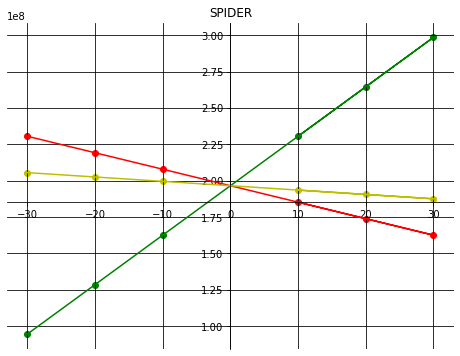

In [72]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('SPIDER')

# move axes
ax.spines['left'].set_position(('axes', 0.50))
# ax.spines['left'].set_smart_bounds(True)
ax.yaxis.set_ticks_position('left')

ax.spines['bottom'].set_position(('axes', 0.450))
# ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.grid(True,c='black')

ax.scatter(df.PERCENT,df.OIL_PRICE,c='g')
ax.plot(df.PERCENT,df.OIL_PRICE,c='g')
ax.scatter(df.PERCENT,df.OPEX,c='r')
ax.plot(df.PERCENT,df.OPEX,c='r')
ax.scatter(df.PERCENT,df.CAPEX,c='y')
ax.plot(df.PERCENT,df.CAPEX,c='y')
ax.legend(['OIL PRICE','OPEX','CAPEX'])
ax.set_xlabel('Variation, % ---->',c='blue',position=(1.1,30))
ax.set_ylabel('NPV, Billion ---->',c='blue',position=(-30,0))